# Egenskapene til fire numeriske metoder for løsning av differensiallikninger

**TMA4320 Introduksjon til Vitenskapelige Beregninger**

## Innledning

I dette prosjektet skal vi bruke Hénon-Heiles modellen til å undersøke fire ulike numeriske metoder ved å se på konvergensorden, energibevaring og Poincaré-kutt. De numeriske metodene er Bogacki-Shampine av orden 3, Kuttas metode av orden 4, Kahans metode av orden 2, og Störmer-Verlet av orden 2. 

Til slutt skal vi på grunnlag av disse testene prøve å konkludere med hvilken av de numeriske metodene som er best, både med ulike steglengder og tidsintervaller. 

### Hamiltonske systemer

Hamiltonske systemer brukes i mekanikken for å beskrive dynamiske systemer ved bruk av posisjon og impuls, $q$ og $p$ som variabler. Siden disse to har samme dimensjon, d, betyr det at de Hamiltonske systemene totalt sett har en dimensjon på $m=2d$. Hamiltonfunksjonen er en energifunksjon $H(q,p)$ som bidrar til å beskrive disse systemene ved at den deles opp i kinetisk energi $T(q,p)$ og potensiell energi $V(q)$. Vi kan herfra utlede differensiallikningene:

$q'=\frac{\partial H}{\partial p}(q,p)$
                        

$p'=-\frac{\partial H}{\partial q}(q,p)$

En av egenskapene ved løsningen til Hamiltonske systemer er at energien er bevart over tid. 

$\frac{d}{dt}H(q(t), p(t)) = 0$

En annen egenskap er at ved å tenke på løsningen av differensiallikningen som en transformasjon av initialverdien, så vil Hamiltonske systemmer fremkomme. 


### Hénon-Heiles

Et eksempel på et Hamiltonsk system er Hénon-Heiles modellen som er i 4 dimensjoner og har Hamiltonfunksjonen

$H(q,p)= \frac{1}{2}(p_1^2 +p_2^2)+U(q)$

der $q ∈ \mathbb{R}^2$, $p ∈ \mathbb{R}^2$ og $U(q)$ er potensiell energi på formen $U(q)=\frac{1}{2}(q_1^2+q_2^2)+λ(q_1^2q_2 −\frac{1}{3}q_2^3)$.

I dette dynamiske systemet vil løsningens oppførsel avhenge av initialverdiene som brukes. (**Dette er fordi...**).

- This mapping is represented for the two energy levels $H = \frac{1}{12}$ and $H = \frac{1}{8}$
- Fig. 3.5 and its study allows to better understand the behaviour of the orbits. We see no significant difference between the two cases, simply for larger H the deforma- tions are more violent and correspond to larger eigenvalues of the Jacobian of Φ. In both cases we have seven fixed points, which correspond to periodic solutions of the system (3.3). Four of them are stable and lie inside the white islands of Fig. 3.2.



### Symplektiske funksjoner/metoder

noe

### Om metodene:

Den første metoden vi implementerer er **Bogacki-Shampine** (forkortet *BS* i koden). Bogacki-Shampine er en Runge-Kutta metode av tredje orden. Den har 4 steg, slik at den bruker omtrent tre funksjonsevalueringer per steg. 

$F_1 = F(y_n)$

$F_2 = F(y_n + \frac{1}{2}hF_1)$

$F_3 = F(y_n + \frac{3}{4}hF_2)$

$y_{n+1} = y_n + h(\frac{2}{9}F_1 + \frac{1}{3}F_2 + \frac{4}{9}F_3)$

I dette prosjektet skal vi bruke konstant skrittlengde, og dropper dermed muligheten for eksplisitt avhengighet av tid, t.

Den andre metoden vi implementerer er **Kuttas metode av orden 4**. 

$F_1 = F(y_n)$

$F_2 = F(y_n + \frac{1}{2}h F_1)$

$F_3 = F(y_n + \frac{1}{2}h F_2)$

$F_4 = F(y_n + h F_3)$

$y_{n+1} = y_n + h(\frac{1}{6}F_1 + \frac{1}{3}F_2 + \frac{1}{3}F_3 + \frac{1}{6}F_4)$

**Kahans metode** er en lineær-implisitt metode definert for differensiallikninger med kvadratiske høyresider. 

$\frac{y_{i,n + 1} - y_{i,n}}{h} = \sum_{j,k = 1}^{m} a_{ijk}\frac{y_{j,n}y_{k,n + 1} + y_{j,n+1}y_{k,n}}{2} + \sum_{j = 1}^{m} b_{ij}\frac{y_{j,n}+y_{j,n+1}}{2} + c_i$

Vi må her løse for $(y_{1,n+1}, ..., y_{m,n+1})^T$ i hvert tidssteg, som er et lineært system av likninger.

**Störmer-Verlet** (forkortet *SV* i koden)

Störmer-Verlet er laget for andreordens systemer på formen $q''=f(q)$, som eksempelvis Hénon-Heiles systemet. 

$p_{n+\frac{1}{2}} = p_n + \frac{1}{2}hf(q_n)$

$q_{n+1} = q_n + hp_{n+\frac{1}{2}}$

$p_{n+1} = p_{n+\frac{1}{2}} + \frac{1}{2}hf(q_{n+1})$

Ifølge [1] er Störmer-Verlet en symplektisk funksjon.

Importerer nyttige biblioteker:

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time                       # Til testing underveis
from scipy import integrate

Gjennom hele prosjektet vil vi benytte oss av jit for å gjøre at koden kjører mer effektivt, slik at vi kan få bedre resultater. 

In [27]:
# MERK: DU MÅ MEST SANNSYNLIGVIS RESTARTE PYTHON KERNELEN DIN FOR AT NUMBA SKAL BLI RIKTIG INSTALLERT
# Kernel -> Restart
%pip install numba
from numba import jit
from numba.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

# Remove annoying deprecation warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

Note: you may need to restart the kernel to use updated packages.


## Oppgave 1, konvergensorden

Først skal vi bekrefte konvergensordenen for globalfeil i de numeriske metodene. Vi implementerer de fire metodene og estimerer så konvergensordenen. Deretter fremstiller vi konvergensordenen i et loglog-plot av globalfeil mot skrittlengde, og beregner tall for ordensestimatet.

Ved å bekrefte ordenen til en numerisk metode, kan vi validere implementasjonen. Dersom vi har implementert en metode feil, vil vi få gale resultater, selv om disse ikke nødvendigvis ser gale ut. Med en bekreftet orden, vet vi hvert fall at metoden burde fungere som normalt. 

Først starter vi med å implementere de ulike numeriske metodene. Felles for implementasjonene er at vi starter med å beregne antall tidssteg og lage et array med hva som skal beregnes. Vi beregner antall tidssteg ved å ta tidsintervallet delt på steglengden, men vi må også regne ut $(T_{end}-t_0)$%$h$. Dette gjør vi fordi vi ikke kan anta at h "går opp" i $T_{end}$. Deretter lager vi et array som skal inneholde y-verdiene som vi ønsker å beregne. Her har vi dimensjonene $n+1$ og $4$ fordi vi ønsker resultater fra alle $(n+1)$ punktene og det er 4 variabler i Hénon-Heiles som vi ønsker å beregne. Vi lager også en funksjon *F* som bruker differensiallikningene fra Hénon-Heiles til å beregne de fire variablene.

I implementeringen av **Bogacki-Shampine** bruker vi stegene i metoden og kalte på *F*. Dette gjorde vi for alle tidsstegene, og slik fikk vi beregnede verdier. Implementeringen av **Kuttas metode av orden 4** var ganske lik, men med andre steg i beregningen. 

**Kahans metode** skiller seg fra de to første. Likningen for beregning av hvert steg står lengre opp. Hvert steg beregnes ved å løse en matriselikning $Ay=b$, der vi ved hjelp av en innebygd løser beregner den neste verdien. For oss er

$ A = $$\begin{bmatrix} 1&0&-\frac{h}{2}&0 \\ 0&1&0&-\frac{h}{2} \\ \frac{h}{2}+hy_{i}&hy_{i}&1&0 \\ hy_{i}&\frac{h}{2}-hy_{i}&0&1 \end{bmatrix}$$ $, $ b = $$\begin{pmatrix} y_{i}+\frac{h}{2}y_{i} \\ y_{i}+\frac{h}{2}y_{i} \\ y_{i}-\frac{h}{2}y_{i} \\ y_{i}-\frac{h}{2}y_{i} \end{pmatrix}$$ $.

Dette brukes til å beregne det neste steget $y_{i+1}$.

For å beregne **Störmer-Verlet** brukte vi likningene som står lengre opp. Vi valgte å gjøre alt i én funksjon i stedet for å kalle på eksterne funksjoner for en mer oversiktlig og effektv kode. Vi beregner $(q1,q2,p1,p2)$ i hvert tidssteg ved hjelp av de utdelte likningene.

In [28]:
@jit(nopython=True)
def F(y,Fvec):                              # Funksjonen med difflikningene fra Hénon-Heiles
    Fvec[0] = y[2]
    Fvec[1] = y[3]
    Fvec[2] = -y[0] * (1+2*y[1])
    Fvec[3] = - (y[1] + y[0]**2 - y[1]**2)

@jit(nopython=True)
def BS(y0,h0,F,t0,Tend):           # Bogacki-Shampine av orden 3
    
    h = h0
    
    # Regn ut antall tidssteg
    n = np.int(np.round((Tend - t0)/h))
    if not abs(Tend-t0)%h < 1e-12:
        n += 1
    
    # Lager array som skal inneholde y
    y_vec = np.zeros((n+1,4))
    y_vec[0,:] = y0
    
    Fvec = np.zeros((3,4))   # Fordi F skal kalles på 3 ganger, og det er 4 variabler som beregnes
    t = np.zeros(n+1)        # Denne metoden er litt treg, men enkel
    t[0] = t0
    
    for i in range(n):
        h = min(h,Tend-t[i])                        # For å sørge for at hele området beregnes
        t[i+1] = t[i] + h
        y_i = y_vec[i,:]
        F(y_i , Fvec[0])                            # Bruker likningene i metoden, skrevet over
        F(y_i + 1/2 * h * Fvec[0], Fvec[1])
        F(y_i + 3/4 * h * Fvec[1], Fvec[2])
        y_vec[i+1,:] = y_i + h / 9 * (2*Fvec[0] + 3*Fvec[1] + 4*Fvec[2])
    
    return y_vec, t

@jit(nopython=True)
def Kutta(y0,h0,F,t0,Tend):      # Kuttas metode av orden 4
        
    h = h0
    
    # Regn ut antall tidssteg
    n = np.int(np.round((Tend - t0)/h))
    if not abs(Tend-t0)%h < 1e-12:
        n += 1
    
    # Lager array som skal inneholde y
    y_vec = np.zeros((n+1,4))
    y_vec[0,:] = y0
    
    Fvec = np.zeros((4,4))
    t = np.zeros(n+1)
    t[0] = t0
    
    for i in range(n):
        h = min(h,Tend-t[i])
        t[i+1] = t[i] + h
        y_i = y_vec[i,:]
        F(y_i , Fvec[0])
        F(y_i + h / 2 * Fvec[0], Fvec[1])
        F(y_i + h / 2 * Fvec[1], Fvec[2])
        F(y_i + h * Fvec[2], Fvec[3])
        y_vec[i+1,:] = y_i + h / 6 * (Fvec[0] + 2*Fvec[1] + 2*Fvec[2] + Fvec[3])
        
    return y_vec, t

@jit(nopython=True)
def kahan(y0,h0,F,t0,Tend):           # Kahans metode av orden 2
        
    h = h0
    
    # Regn ut antall tidssteg
    n = np.int(np.round((Tend - t0)/h))
    if not abs(Tend-t0)%h < 1e-12:
        n += 1
    
    # Lager array som skal inneholde y som er n + 1 x 2 for eksempelligningen
    y_vec = np.zeros((n+1,4))
    
    y_vec[0] = y0
    
    t = np.zeros(n+1)
    t[0] = t0
    
    for i in range(n):
        h = min(h,Tend-t[i])
        t[i+1] = t[i] + h
        
        # Matrisen A
        A = np.array([[1,                   0,                  -h/2,  0  ],
                      [0,                   1,                   0,  -h/2 ],
                      [h/2+h*y_vec[i,:][1], h*y_vec[i,:][0],     1,    0  ],
                      [h*y_vec[i,:][0],     h/2-h*y_vec[i,:][1], 0,    1  ]])

        # Vektor b
        b = np.array([y_vec[i,:][0]+h/2*y_vec[i,:][2],
                      y_vec[i,:][1]+h/2*y_vec[i,:][3],
                      y_vec[i,:][2]-h/2*y_vec[i,:][0],
                      y_vec[i,:][3]-h/2*y_vec[i,:][1]])
        
        y_vec[i+1,:] = np.linalg.solve(A,b)    # Beregner det neste steget ved hjelp av A og b
    
    return y_vec, t

@jit(nopython=True)
def SV(y0,h0,F,t0,Tend):             # Störmer-Verlet av orden 2
        
    h = h0
    
    # Regn ut antall tidssteg
    n = np.int(np.round((Tend - t0)/h))
    if not abs(Tend-t0)%h < 1e-12:
        n += 1
    
    # Lager array som skal inneholde y som er n + 1 x 2 for eksempelligningen
    y_vec = np.zeros((n+1,4))
    y_vec[0] = y0
    
    f1_old = -y_vec[0,0] * (1+2*y_vec[0,1])
    f2_old = -(y_vec[0,1] + y_vec[0,0]**2 - y_vec[0,1]**2)
    
    t = np.zeros(n+1)
    t[0] = t0
    
    for i in range(1,n+1):
        h = min(h,Tend-t[i])
        t[i+1] = t[i] + h
        p1_half = y_vec[i-1,2] + 1/2 * h * f1_old
        p2_half = y_vec[i-1,3] + 1/2 * h * f2_old
        y_vec[i,0] = y_vec[i-1,0] + h * p1_half
        y_vec[i,1] = y_vec[i-1,1] + h * p2_half
        f1 = -y_vec[i,0] * (1+2*y_vec[i,1])
        f2 = -(y_vec[i,1] + y_vec[i,0]**2 - y_vec[i,1]**2)
        y_vec[i,2] = p1_half + 1/2 * h * f1
        y_vec[i,3] = p2_half + 1/2 * h * f2
        f1_old = f1
        f2_old = f2
        
    return y_vec, t

# Beregner p01 ved gitte startverdier for q1,q2,p2 
def p_01(H0,q01,q02,p02,l):
    return np.sqrt(2*H0-p02**2-q01**2-q02**2-2*l*(q01**2*q02-1/3*q02**3))

# Beregner Hamiltonfunksjonen
def H(y):
    return 1/2*(y[2]**2+y[3]**2+y[0]**2+y[1]**2)+1*y[0]**2*y[1]-1/3*y[1]**3

Definerer konstanter og initialbetingelsene til plotting.

In [29]:
# Initialbetingelser fra oppgaven, for å havne i ikke-kaotisk løsningsrom
q01 = 0
q02 = 0.45
p02 = 0
H0 = 1/12 
l = 1
p01 = p_01(H0,q01,q02,p02,l)
y_0 = np.array([q01,q02,p01,p02])

t_0 = 0.0
T = 2 * np.pi     # Ønsker kort tid til de første beregningene, da de bare er tester
# Velger veldig liten h slik at funksjonene tar litt tid å kjøre...
h = 0.001

Plotter $(q1,q2,p1,p2)$ for hver av de fire metodene med initialbetingelsene over.

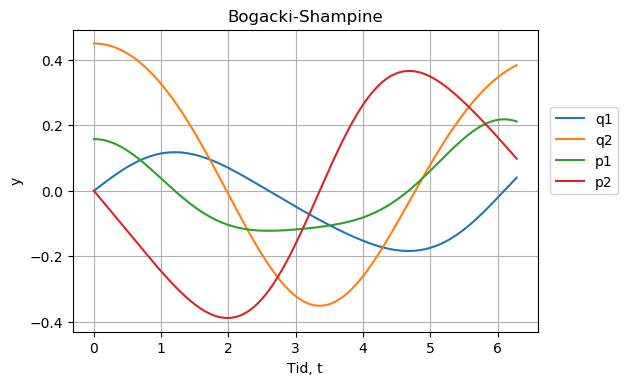

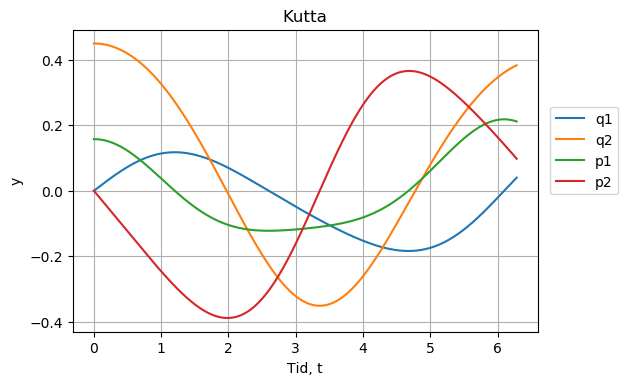

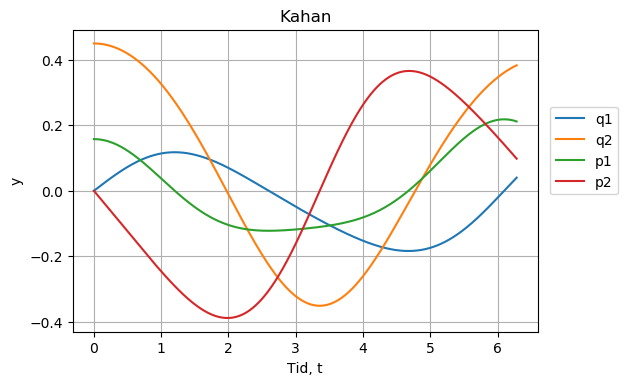

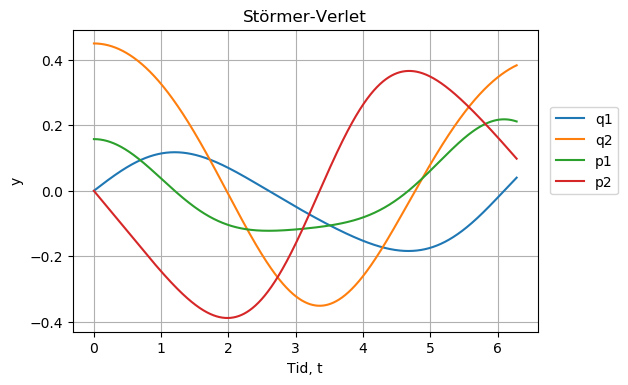

In [30]:
# Plotter for de fire ulike metodene
y_vecBS,t_vec = BS(y_0,h,F,t_0,T)                      # BS

plt.figure(dpi=100)
plt.title("Bogacki-Shampine")
plt.plot(t_vec, y_vecBS[:,0], label = "q1")
plt.plot(t_vec, y_vecBS[:,1], label = "q2")
plt.plot(t_vec, y_vecBS[:,2], label = "p1")
plt.plot(t_vec, y_vecBS[:,3], label = "p2")
plt.xlabel("Tid, t")
plt.ylabel("y")
plt.legend(bbox_to_anchor=[1.1,0.6],loc="center")
plt.grid()
plt.show()

y_vecKutta, t_vec = Kutta(y_0,h,F,t_0,T)               # Kutta

plt.figure(dpi=100)
plt.title("Kutta")
plt.plot(t_vec, y_vecKutta[:,0], label = "q1")
plt.plot(t_vec, y_vecKutta[:,1], label = "q2")
plt.plot(t_vec, y_vecKutta[:,2], label = "p1")
plt.plot(t_vec, y_vecKutta[:,3], label = "p2")
plt.xlabel("Tid, t")
plt.ylabel("y")
plt.legend(bbox_to_anchor=[1.1,0.6],loc="center")
plt.grid()
plt.show()

y_vecKahan, t_vec = kahan(y_0,h,F,t_0,T)                # Kahan

plt.figure(dpi=100)
plt.title("Kahan")
plt.plot(t_vec, y_vecKahan[:,0], label = "q1")
plt.plot(t_vec, y_vecKahan[:,1], label = "q2")
plt.plot(t_vec, y_vecKahan[:,2], label = "p1")
plt.plot(t_vec, y_vecKahan[:,3], label = "p2")
plt.xlabel("Tid, t")
plt.ylabel("y")
plt.legend(bbox_to_anchor=[1.1,0.6],loc="center")
plt.grid()
plt.show()

y_vecSV, t_vec = SV(y_0,h,F,t_0,T)                      # SV

plt.figure(dpi=100)
plt.title("Störmer-Verlet")
plt.plot(t_vec, y_vecSV[:,0], label = "q1")
plt.plot(t_vec, y_vecSV[:,1], label = "q2")
plt.plot(t_vec, y_vecSV[:,2], label = "p1")
plt.plot(t_vec, y_vecSV[:,3], label = "p2")
plt.xlabel("Tid, t")
plt.ylabel("y")
plt.legend(bbox_to_anchor=[1.1,0.6],loc="center")
plt.grid()
plt.show()

At alle metodene gir samme grafer for $(q1,q2,p1,p2)$ er et tegn på at implementasjonene kan stemme. Men disse grafene er kun beregnet over en veldig liten tidsperiode og sier ingenting om egenskapene til metodene, annet enn at likheten mellom de kan tyde på en korrekt implementasjon. 

Nå skal vi estimere konvergensordenen til de numeriske metodene, og sjekke om de tilsvarer den oppgitte ordenen. Dette gjøres fordi det er et veldig godt hjelpemiddel for å sjekke om implementasjonen av metoden kan stemme. Dersom det ikke er samsvar mellom reell orden og den beregnede ordenen tyder det på at det er feil i implementasjonen.

Også her brukes Hénon-Heiles modellen som testsituasjon. Ved beregninger av konvergensorden trenger man en nær eksakt løsning som man kan sammenlikne med de implementerte metodene for å finne feilen. Som referanseløsning bruker vi den innebygde funksjonen *scipy.integrate.solve_ivp()*, som bruker metoden RK45, med veldig lave toleranser. Vi tester for steglengder mellom $1$ og $10^{-4}$. Funksjonen for å sjekke konvergensen tar inn den metoden vi ønsker å teste, og bruker denne metoden for hver av steglengdene. Så beregnes feilen ved å ta normen av differansen mellom den beregnede verdien og referanseverdien. Dette plottes så sammen med en referanselinje som viser den ønskelige ordenen. Dersom den beregnede konvergensgrafen er parallell med referanselinjen tyder dette på at den beregnede ordenen er korrekt.

I tillegg til dette beregnes ordenen, $p$, ved formelen $p \approx \dfrac{ln\frac{E(h_2)}{E(h_1)}}{ln\frac{h_2}{h_1}}$, der $h_1$ og $h_2$ er to etterfølgende steglengder og $E(h)$ er feilen.

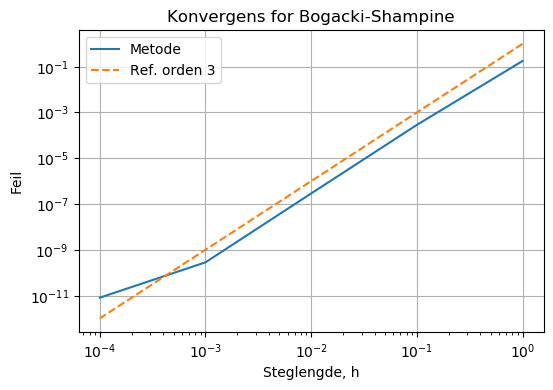

Bogacki-Shampine har orden = 3.1394771278543434


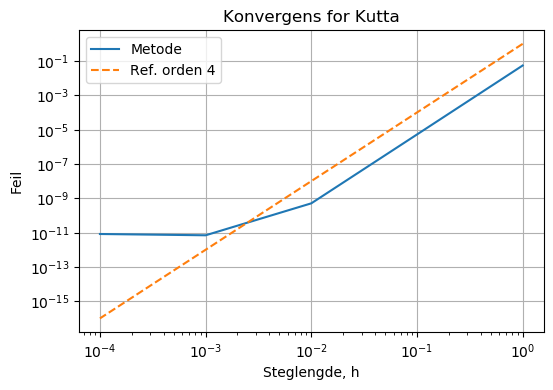

Kutta har orden = 3.9014317405681287


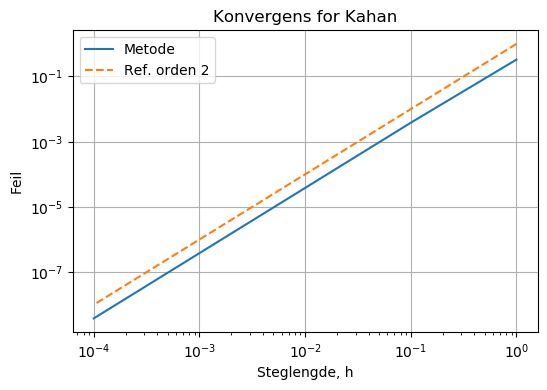

Kahan har orden = 2.1086964294663093


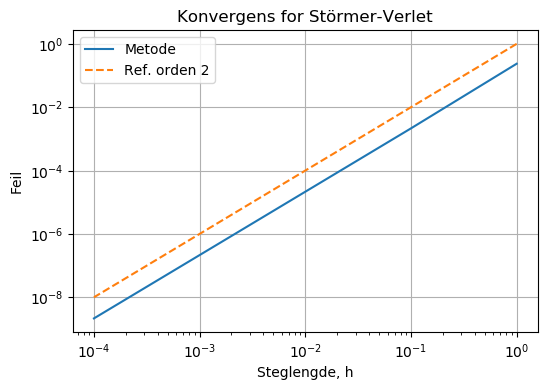

Störmer-Verlet har orden = 2.1906335074577923


In [31]:
def f(t,y):         # Ny funksjon av Hénon-Heiles, uten jit da det ikke fungerer med scipy.integrate lengre ned
    q1 = y[2]
    q2 = y[3]
    p1 = -y[0] * (1+2*y[1])
    p2 = -(y[1] + y[0]**2 - y[1]**2)
    return np.array([q1,q2,p1,p2])

def check_convergence(solve, n, t_0, T, y_0,meth,order):
    
    # Regner ut analytisk løsning for tid T
    y_sol = integrate.solve_ivp(f,(t_0,T),y_0,method="RK45",rtol=1e-12,atol=1e-12)
    
    # Liste som inneholder feilene
    errors = np.zeros(n)
    
    h_vec = np.logspace(0,-4,n)
        
    for k in range(n):
        
        # Løser for y
        y_vec,t = solve(y_0,h_vec[k],F,t_0,T)
        
        # Regner ut feilen i for tid T
        errors[k] = np.linalg.norm(y_vec[-1,:] - y_sol.y[:,-1])
    
    # Approksimativ orden
    p = np.log(abs(errors[-1] - errors[-2])) / np.log(abs(h_vec[-1] - h_vec[-2]))
    
    # Plotter h og feil i loglog plot
    plt.figure(dpi=100)
    plt.loglog(h_vec,errors,label="Metode")
    plt.loglog(h_vec,h_vec**order,label=f"Ref. orden {order}",linestyle="--")
    plt.title(f"Konvergens for {meth}")
    plt.xlabel("Steglengde, h")
    plt.ylabel("Feil")
    plt.grid()
    plt.legend()
    plt.show()
    
    print(f"{meth} har orden = {p}")
    
    return

n = 5
t_0 = 0.0
T = 10
check_convergence(BS, n, t_0, T, y_0,"Bogacki-Shampine",3)
check_convergence(Kutta, n, t_0, T, y_0,"Kutta",4)
check_convergence(kahan, n, t_0, T, y_0,"Kahan",2)
check_convergence(SV, n, t_0, T, y_0,"Störmer-Verlet",2)

Vi ser at alle metodene følger referanselinjen bra. Dette tyder på at metodene kan være riktig implementert.

Både metodene Kahan og Störmer-Verlet ligger tilsynelatende helt parallelt med referanselinjen for orden 2 hele veien. De har også begge beregnede ordener på omtrent 2. Vi kan derfor være fornøyd med disse resultatene, og konkludere med at de oppførte seg som forventet. 

For både Bogacki-Shampine og Kutta er den beregnede feilen parallell med referanselinjen ved størst steglengde og minst feil. I motsetning til de to andre metodene ser vi at det her er en knekk ved feil omtrent lik $10^{-11}$. Dette kommer blant annet av at referanseløsningen ikke er nøyaktig nok. Vi bruker en toleranse i referanseløsningen på $10^{-12}$, og for så små verdier som her vil det bli en del usikkerheter rundt avrunding da det kun brukes et endelig antall siffer i beregningene. De bakerste sifrene vil dermed inneholde usikkerheter, og det fører til avviket i beregningene som i figurene viser seg som et knekk. Men også for disse metodene ser vi at den beregnede ordenen stemmer godt med det reelle, og siden de er parallelle med referanselinjen for høyere verdier kan vi også her konkludere med at de oppfører seg som forventet.

## Oppgave 2, energibevaring

Etter at vi har bekreftet implementasjonen av de numeriske metodene, skal vi undersøke hvor godt metodene bevarer energi i Hamiltonske systemer. Her kan vi ta i bruk de tidligere nevnte Hamiltonfunksjonene. Det vil her være hensiktsmessig å se på så lange tidshorisonter som mulig, da dette vil gi et mer nøyaktig og riktig resultat. Det vil her være ekstra viktig at implementasjonen av metodene er korrekt og mest mulig effektiv, slik at resultatene ikke vil være gale og at kjøretiden blir kortest mulig. Dersom implementasjonen ikke er effektiv nok blir det vanskelig å beregne for store tidsintervaller, da dette vil ta for lang tid. Når det gjelder energibevaring er det mye viktigere å se på dette over et stort tidsintervall enn et kort, da alle metodene er gode på kort intervall og vi ønsker å se hvordan de holder generelt. Og generelt brukes større tidsintervaller under beregninger med metodene. Vi har her satt $T=100$ til å starte med for å kunne sjekke formen på hvordan energien utvikler seg over tid for de ulike metodene. 

For å beregne hvor godt de ulike metodene bevarer energi i Hamiltonske systemer lager vi en funksjon der vi henter y-verdier og t-verdier fra implementasjonene av metodene. Vi konstruerer dermed et tomt array, $E$, med like mange verdier som lengden til vektoren med y-verdier i. Deretter løser vi Hamiltonfunksjonen for hver av verdiene i y-vektoren og setter disse inn i $E$. Da er $E$ et array med alle energiverdiene for hver av metodene vi kjører funksjonen for. Funksjonen returnerer så $E$- og t-verdiene. 

Deretter plotter vi en graf for hver av metodene med energien som funksjon av tid, sammen med en horisontal linje som viser den initielle energiverdien. Vi kan utifra disse plottene se hvor godt de ulike metodene bevarer energi ved å se på hvor mye energiverdiene varierer fra initialverdien. Ved å se på y-aksen i de ulike plottene kan man se hvor store energiendringene er.

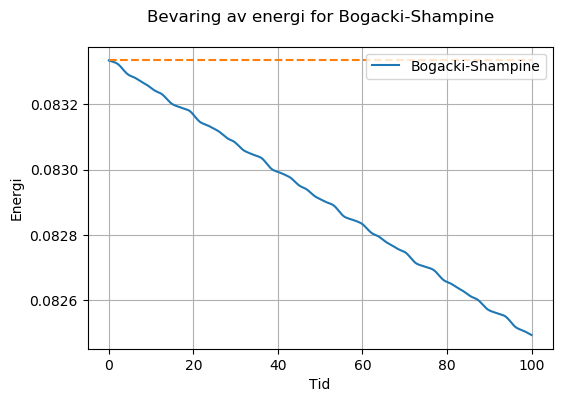

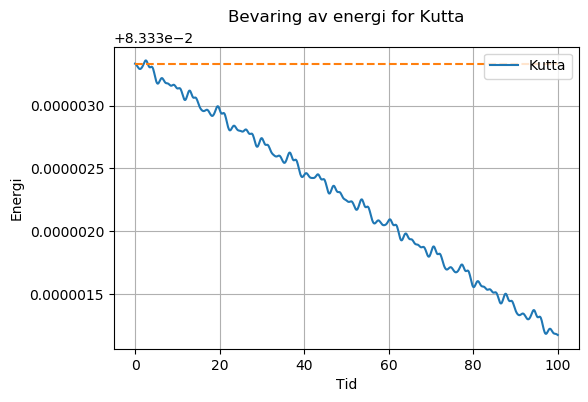

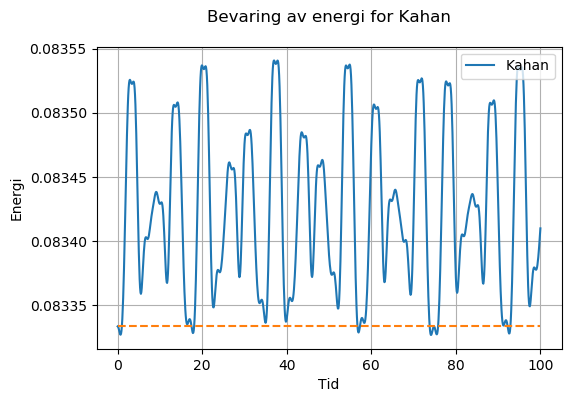

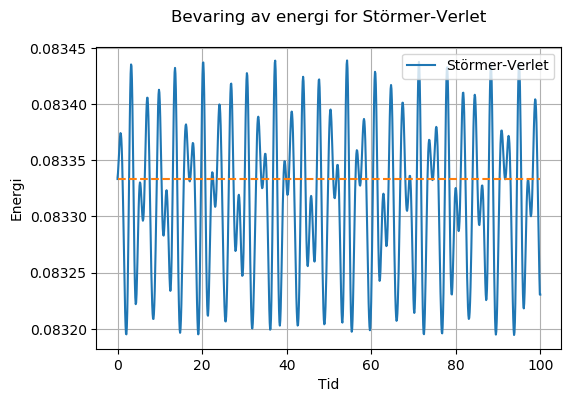

In [32]:
# Energibevaring

t_0 = 0.0

def energy_conservation(solve,y_0,h,t_0,T):
        
    y_vec,t_vec = solve(y_0,h,F,t_0,T)   # Henter resultater ved beregning av angitt metode
        
    N = len(y_vec)
    
    E = np.zeros(N)
    
    E = H(np.transpose(y_vec))        # Beregner energi fra Hamiltonfunksjonen lenger opp
    
    return t_vec,E


T = 100
h = 0.1
t_vec, E_BS = energy_conservation(BS,y_0,h,t_0,T)
method_name = "Bogacki-Shampine"

plt.figure(dpi=100)
plt.title("Bevaring av energi for {}".format(method_name),loc="center",pad=18)
plt.plot(t_vec,E_BS,label=method_name)
plt.plot(t_vec,[H(np.transpose(y_0))]*len(t_vec),ls="--")
plt.xlabel("Tid")
plt.ylabel("Energi")
plt.grid()
plt.legend(loc="upper right")
plt.show()

t_vec, E_Kutta = energy_conservation(Kutta,y_0,h,t_0,T)
method_name = "Kutta"

plt.figure(dpi=100)
plt.title("Bevaring av energi for {}".format(method_name),loc="center",pad=18)
plt.plot(t_vec,E_Kutta,label=method_name)
plt.plot(t_vec,[H(np.transpose(y_0))]*len(t_vec),ls="--")
plt.xlabel("Tid")
plt.ylabel("Energi")
plt.grid()
plt.legend(loc="upper right")
plt.show()

t_vec, E_Kahan = energy_conservation(kahan,y_0,h,t_0,T) # Holder seg godt over lang tid, men trenger lav h
method_name = "Kahan"

plt.figure(dpi=100)
plt.title("Bevaring av energi for {}".format(method_name),loc="center",pad=18)
plt.plot(t_vec,E_Kahan,label=method_name)
plt.plot(t_vec,[H(np.transpose(y_0))]*len(t_vec),ls="--")
plt.xlabel("Tid")
plt.ylabel("Energi")
plt.grid()
plt.legend(loc="upper right")
plt.show()

t_vec, E_SV = energy_conservation(SV,y_0,h,t_0,T) # Holder seg godt over lang tid, men trenger lav h
method_name = "Störmer-Verlet"

plt.figure(dpi=100)
plt.title("Bevaring av energi for {}".format(method_name),loc="center",pad=18)
plt.plot(t_vec,E_SV,label=method_name)
plt.plot(t_vec,[H(np.transpose(y_0))]*len(t_vec),ls="--")
plt.xlabel("Tid")
plt.ylabel("Energi")
plt.grid()
plt.legend(loc="upper right")
plt.show()

Så plotter vi over en lengre tidsperiode for å sjekke hvordan energibevaringen er over tid. Vi velger $T=200000$ som gir oss et godt bilde på energibevaringsegenskapene til metodene. Vi plotter de denne gangen i samme figur for å kunne sammenlikne de direkte.

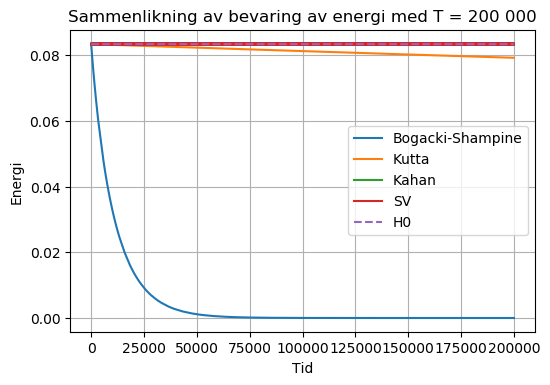

In [37]:
# Plott alle i samme graf
T = 200000    # Ønsker relativt lang tidsperiode
t_vec, E_BS = energy_conservation(BS,y_0,h,t_0,T)
t_vec, E_Kutta = energy_conservation(Kutta,y_0,h,t_0,T)
t_vec, E_Kahan = energy_conservation(kahan,y_0,h,t_0,T)
t_vec, E_SV = energy_conservation(SV,y_0,h,t_0,T)
plt.figure(dpi=100)
plt.title("Sammenlikning av bevaring av energi med T = 200 000")
plt.plot(t_vec,E_BS,label="Bogacki-Shampine")
plt.plot(t_vec,E_Kutta,label="Kutta")
plt.plot(t_vec,E_Kahan,label="Kahan")
plt.plot(t_vec,E_SV,label="SV")
plt.plot(t_vec,[H(np.transpose(y_0))]*len(t_vec),ls="--",label="H0")
plt.xlabel("Tid")
plt.ylabel("Energi")
plt.grid()
plt.legend(loc="center right")
plt.show()

I tillegg til de individuelle plottene, har vi også plottet alle grafene sammen i et plot slik at vi enda tydeligere kan se forskjellen mellom de fire metodene. Her har vi også lagt til initialverdien til energien. For å enklere kunne sammenlikne energibevaringen over tid, har vi satt $T=200 000$. Med en betydelig høyere $T$, vil vi få et mye mer nøyaktig svar, i tillegg til at vi kan se energiutviklingen over et større tidsområdet som gjør det enklere for oss å bestemme hvilken av metodene som bevarer energien best. 

I de individuelle plottene, som er plottet over en liten tidsperiode, ser det ut som Kuttas metode er den beste, da den har best energibevaring. Vi ser at Kahan og Störmer-Verlet oscillerer om startverdien. For å få en reell illustrasjon av energibevaringsegenskapene må vi beregne over en mye større tidsperiode. Vi velger derfor $T=200000$ og beregner over denne perioden. Vi plotter i samme plot for å vise forskjellene på metodene.

Ser vi på grafen der vi sammenlikner alle de numeriske metodene med et betydelig høyere tidsrom, ser vi at resultatene er helt annerledes. Her er Bogacki-Shampine den dårligste metoden når det gjelder energibevaring over lang tid. Störmer-Verlet og Kahans metode som vi tidligere så at oscillerer om startverdien er her de metodene som bevarer energien best. På figuren er det umulig å skille disse to metodene fra hverandre, og fra den horisontale linjen som viser startverdien. Sammenliknet med disse, beveger Bogacki-Shampine og Kuttas metode seg stadig vekk fra initialverdien. De mister energi over lang tid, og synker mot null. Dermed kan vi se at for et stort tidsrom vil disse bevare energi mye dårligere enn Störmer-Verlet og Kahans metode. Når vi sammenlikner Bogacki-Shampine med Kuttas metode, ser vi at Bogacki-Shampine går mye raskere mot null enn det Kuttas metode gjør. Dermed er Kuttas metode en betydelig bedre metode enn Bogacki-Shampine når det gjelder energibevaring. 

Dette betyr at ved simuleringer over en større tidsperiode lønner det seg å bruke Störmer-Verlet eller Kahan i stedet for Kutta eller Bogacki-Shampine. Men i en del tilfeller er det mer hensiktsmessig å simulere over en kortere tidsperiode, men med mindre steglengde. Hvis vi går tilbake til grafene fra konvergensorden kan vi se der at Kahan og Störmer-Verlet også er de beste metodene for mindre skrittlengder. Disse vil, ut fra beregningene i oppgave 1, fungere helt fint ved for eksempel $h=10^{-4}$, mens både Kutta og Bogacki-Shampine vil ha større feil her. Vi kan dermed etter disse to oppgavene si at Störmer-Verlet og Kahan er bedre metoder både ved simuleringer med små steglengder og ved simuleringer ved lengre tidsperioder.

## Oppgave 3, Poincaré-kutt

I den siste oppgaven skal vi beregne og plotte Poincaré-kutt for de numeriske metodene. 

Her plotter vi først en graf for hver av de fire numeriske metodene med $H_0 = \frac{1}{12}$ og så for $H_0 = \frac{1}{10}$. Det er her interessant å se på forskjellige energiverdier, slik at vi virkelig kan se hvordan de numeriske metodene fungerer først ved en verdi vi vet at ikke er i det kaotiske løsningsrommet, før vi så ser hvordan metodene håndterer små endringer i energinivået.

For å implementere dette brukte vi initialbetingelsene til å beregne initialverdiene (gjort lengre opp). Vi beregner for $h=0.1$ og $T=1000000$. Disse initialverdiene tok vi så inn i funksjonen, der de ble brukt til å beregne $(q1,q2,p1,p2)$ ut fra resultater fra den angitte metoden. Ut fra dette brukte vi interpolasjon, og endte med verdier for $q2$ og $p2$ som vi lagret for hvert skritt. Deretter brukte vi verdiene for $q2$ og $p2$ til å plotte disse mot hverandre. Dette er det som er kjent som Poincaré-kutt. Det vi forventer er en glatt kurve, lik den Poincaré-kurven som er på side 7 i prosjektbeskrivelsen. 

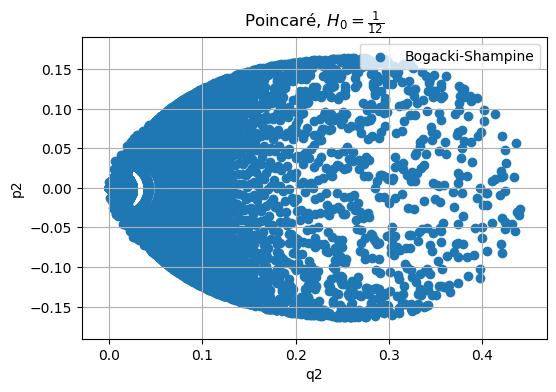

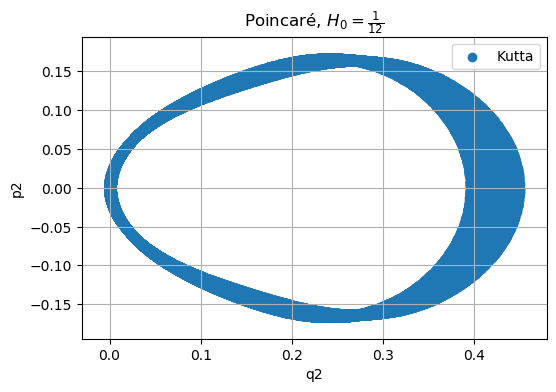

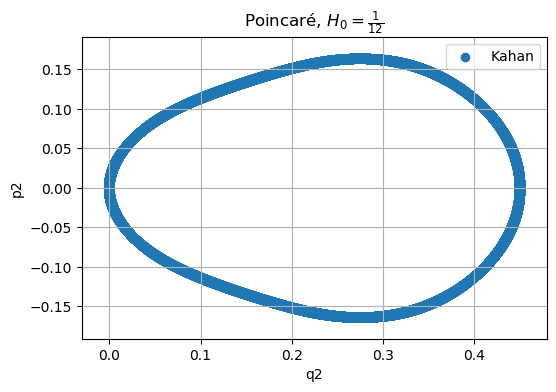

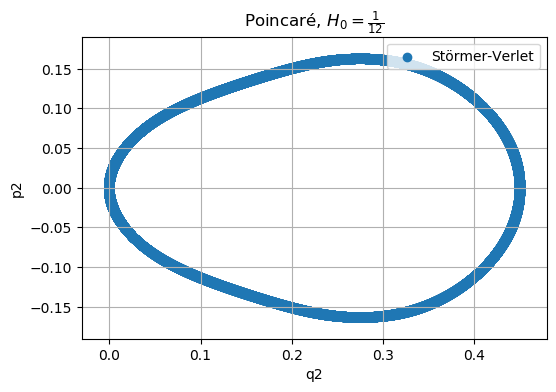

In [34]:
def poincare(solve,y_0,h0,t_0,T):
    h = h0
    y_vec,t_vec = solve(y_0,h,F,t_0,T)
    
    q2_list = []
    p2_list = []
    
    for i in range(1,len(y_vec)):
        if(y_vec[i,0]*y_vec[i-1,0] < 0 and y_vec[i,2] > 0):
            q11 = y_vec[i-1,0]
            q12 = y_vec[i,0]
            q21 = y_vec[i-1,1]
            q22 = y_vec[i,1]
            q2 = (q22-q21)*q11/(q11-q12)+q21 # Interpolasjon satt sammen til ett steg
            p21 = y_vec[i-1,3]
            p22 = y_vec[i,3]
            p2 = (p22-p21)*q11/(q11-q12)+p21
            q2_list.append(q2)
            p2_list.append(p2)
    
    return q2_list, p2_list          # Ønsker punktene med q2- og p2-verdier for å lage Poincaré-kurver

# Plotter over lang tidsperiode (T = 1 000 000) og med h=0.1 for å få gode resultater der vi kan se forskjell på metodene
q2_list, p2_list = poincare(BS,y_0,0.1,t_0,1000000)
plt.figure(dpi=100)
plt.title(r"Poincaré, $H_0=\frac{1}{12}$")
plt.scatter(q2_list,p2_list,label="Bogacki-Shampine")
plt.xlabel("q2")
plt.ylabel("p2")
plt.legend(loc="upper right")
plt.grid()
plt.show()

q2_list, p2_list = poincare(Kutta,y_0,0.1,t_0,1000000)
plt.figure(dpi=100)
plt.title(r"Poincaré, $H_0=\frac{1}{12}$")
plt.scatter(q2_list,p2_list,label="Kutta")
plt.xlabel("q2")
plt.ylabel("p2")
plt.legend(loc="upper right")
plt.grid()
plt.show()

q2_list, p2_list = poincare(kahan,y_0,0.1,t_0,1000000)
plt.figure(dpi=100)
plt.title(r"Poincaré, $H_0=\frac{1}{12}$")
plt.scatter(q2_list,p2_list,label="Kahan")
plt.xlabel("q2")
plt.ylabel("p2")
plt.legend(loc="upper right")
plt.grid()
plt.show()

q2_list, p2_list = poincare(SV,y_0,0.1,t_0,1000000)
plt.figure(dpi=100)
plt.title(r"Poincaré, $H_0=\frac{1}{12}$")
plt.scatter(q2_list,p2_list,label="Störmer-Verlet")
plt.xlabel("q2")
plt.ylabel("p2")
plt.legend(loc="upper right")
plt.grid()
plt.show()

Ser vi på grafene med $H_0 = \frac {1}{12}$, ser vi at Bogacki-Shampine er den metoden som er mest ulik den forventede poincaré-grafen. Her ser vi at det er stor spreding i punktene. Kuttas metode er en del bedre. Vi kan se at den følger omtrentlig samme form som den forventede kurven, med at den er bredere. Samtidig kan vi se at Poincaré-kurvene som kommer fra Kahans metode og Störmer-Verlet ser tilnærmet identisk ut som den forventede kurven. 

Disse resultatene passer veldig godt overens med oppgave 2. Der så vi at Bogacki-Shampine var betydelig dårligere enn de andre metodene til å bevare energien. Dette viser seg her også, gjennom at punktene er mer spredt. Poincaré-kurven viser der $q2$ og $p2$ møtes, og over en stor tidsperiode (som her) vil dette endre seg dersom ikke energien er tilnærmet konstant. Vi så i oppgave 2 at dette ikke var tilfellet for Bogacki-Shampine, og dette kan forklare den store spredningen i punktene. Kuttas metode hadde litt bedre energibevaring i oppgave 2, og det ser vi også her. Kurven likner på den forventede, men litt tykkere noen steder. Det viser at det har vært litt spredning i punktene, som kommer av at energien har endret seg litt over tidsperioden. I oppgave 2 så vi også at Kahans metode og Störmer-Verlet viste seg å være de beste metodene når det gjaldt å bevare energi over en større tidsperiode. Dette samsvarer med det vi ser i Poincaré-kurvene her. Siden kurvene for disse metodene følger den forventede kurven over en så stor tidsperiode viser det at disse metodene bevarer energi veldig godt. Det er minimalt med avvik i energien over tidsperioden, som viser seg her ved at de har laget fine, glatte kurver. Vi ser også at kurvene har en jevn tykkelse rundt hele, som igjen viser hvor lite spredning det er i punktene. 

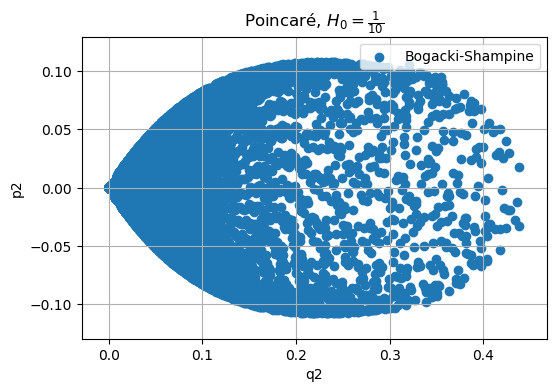

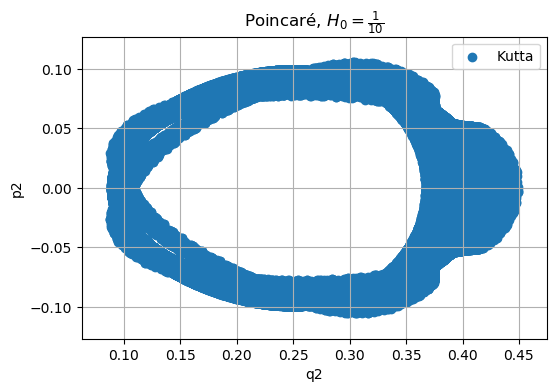

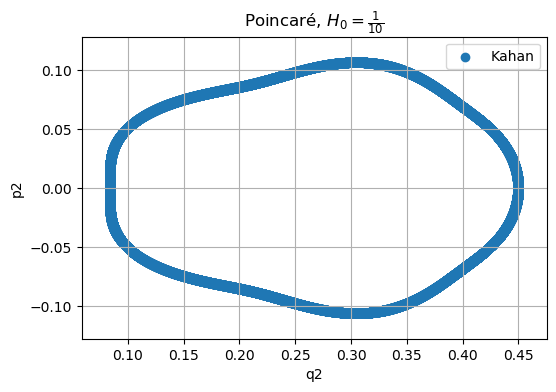

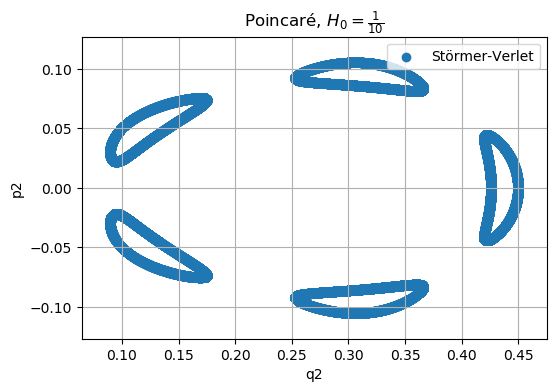

In [35]:
H02 = 1/10      # Prøver med en liten endring i initiell energi
p01 = p_01(H02,q01,q02,p02,l)    # beregner p01 med den nye energien
y_02 = np.array([q01,q02,p01,p02])     # De nye initialbetingelsene

q2_list, p2_list = poincare(BS,y_02,0.1,t_0,1000000)
plt.figure(dpi=100)
plt.title(r"Poincaré, $H_0=\frac{1}{10}$")
plt.scatter(q2_list,p2_list,label="Bogacki-Shampine")
plt.xlabel("q2")
plt.ylabel("p2")
plt.legend(loc="upper right")
plt.grid()
plt.show()

q2_list, p2_list = poincare(Kutta,y_02,0.1,t_0,1000000)
plt.figure(dpi=100)
plt.title(r"Poincaré, $H_0=\frac{1}{10}$")
plt.scatter(q2_list,p2_list,label="Kutta")
plt.xlabel("q2")
plt.ylabel("p2")
plt.legend(loc="upper right")
plt.grid()
plt.show()

q2_list, p2_list = poincare(kahan,y_02,0.1,t_0,1000000)
plt.figure(dpi=100)
plt.title(r"Poincaré, $H_0=\frac{1}{10}$")
plt.scatter(q2_list,p2_list,label="Kahan")
plt.xlabel("q2")
plt.ylabel("p2")
plt.legend(loc="upper right")
plt.grid()
plt.show()

q2_list, p2_list = poincare(SV,y_02,0.1,t_0,1000000)
plt.figure(dpi=100)
plt.title(r"Poincaré, $H_0=\frac{1}{10}$")
plt.scatter(q2_list,p2_list,label="Störmer-Verlet")
plt.xlabel("q2")
plt.ylabel("p2")
plt.legend(loc="upper right")
plt.grid()
plt.show()

Når vi øker initialenergien til $\frac{1}{10}$, kan vi forvente at Poincaré-kurvene for de ulike metodene vil være en dårligere representasjon enn den i oppgaveheftet. Dette gir mening fordi med mer energi vil vi få et større utslag. Det betyr at det er mer energi totalt som ikke blir bevart, og dermed vil vi få større utslag og andre verdier for punktene vi plotter. Dette kan vi se tydelig i grafene som representerer de ulike numeriske metodene. Her kan vi se at Störmer-Verlet nå er ganske ulik grafen i oppgaveheftet, mens Kahan fortsatt er en lukket kurve som ikke er for ulik den forventede. Dersom vi hadde endret slik at $H_0 = \frac{1}{8}$ så hadde vi fått motsatt, nemlig at Störmer-Verlet er den som ligner mest på den lukkede kurven i prosjektbeskrivelsen. Da kunne vi sett at Kahan var på samme form som det Störmer-Verlet er her ($H_0 = \frac{1}{10}$). Det er dermed vanskelig å skille disse metodene, da begge viser at de tåler små energiutslag på en god måte. Vi ser over at Poincaré-kurven for Kuttametoden har blitt betydelig tykkere, så den tåler ikke energiendringen like godt som Störmer-Verlet og Kahan. 

Vi kan uansett konkludere med at konklusjonen vår fra de tidligere oppgavene er korrekt også her. Störmer-Verlet og Kahans metode er de beste metodene når det gjelder bevaring av energi over store tidsperioder. Her ser vi også at det er de metodene som tåler små endringer i energi best. De vil dermed gi den beste representasjonen av systemet. 

### Avslutning

I prosjektet har vi undersøkt de fire numeriske metodene Bogacki-Shampine, Kuttas metode av orden 4, Kahans metode og Störmer-Verlet med Hénon-Heiles modellen. Vi har sett på konvergensorden, energibevaring og Poincaré-kutt for å avgjøre hvilken av disse metodene som er best med ulike steglengder og tidslinjer. Først implementerte vi metodene og deretter validerte vi implementasjonen ved å plotte og bekrefte ordenen til metodene, som her passet med det reelle. Videre undersøkte vi hvor gode metodene var på energibevaring og plottet grafer over energibevaringen til hver metode. Her gjorde en betydelig økning i tid at vi fikk mer korrekte resultater og kunne konkludere med at Kahans metode og Störmer-Verlets metode er best både ved simuleringer med små steglengder og ved simuleringer med lengre tidsperioder. Vi fikk også bekreftet dette da vi plottet Poincaré-kutt for to ulike $H_0$-verdier for de numeriske metodene. I tillegg, observerte vi at ved en høyere initialenergi, så ville grafene skille seg mer fra virkeligheten. Gjennom undersøkning av de fire numeriske metodene, er det flere ting som bekrefter at Kahans metode og Störmer-Verlet er de best egnede metodene for en slik modell.

### Referanser:

[1]:  E. Hairer, Ch. Lubich, and G. Wanner. Geometric numerical integration, volume 31 of Springer Series in Computational Mathematics. Springer, Heidelberg, 2010. Structure-preserving algorithms for ordinary differential equations, Reprint of
the second (2006) edition. (https://link.springer.com/content/pdf/10.1007%2F3-540-30666-8.pdf)